# Project: TMDB Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Analysis Questions
In this analysis, I plan to explore the answers to the following questions:

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from scipy import stats
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df.shape

(10866, 21)

The dataset consists of 10,866 rows and 21 columns.

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Following are all the numerical columns in the dataset:

- id: The ID of a movie.
- popularity: The popularity of a movie. The average popularity of the movies is 0.646. Most of the values are between 0.208 and 0.714 but there are huge outliers like the max value of 32.986.
- budget: The budget of a movie. The average budget of a movie is about \$14 million.
- revenue: The revenue accumulated by a movie. On average, each movie amassed around \$39.82 million in revenue.
- runtime: The runtime of a movie, in minutes. The movies are running for an average of 102 minutes.
- vote_count: The count of votes in a movie.
- vote_average: The average rating of a movie.
- release year: The year a movie was released.
- budget_adj: The budget of a movie, adjusted by inflation.
- revenue_adj: The revenue of a movie, adjusted by inflation.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As seen above, some columns have null values. For example, only 2936 movies have homepages and not all movies have imdb_id, cast (how did they make the movies then?), director, tagline, keywords, overview, or production companies.

Note: Before performing data cleaning, it might be a good idea to write the research questions now.

### Data Cleaning

#### 1. Movies with no cast
I know this isn't very important, but I am curious as to what kinds of movies had no cast, so I am going to explore that first.

In [5]:
# Get first 5 rows where `cast` is NA.

df[df['cast'].isna()].head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.0,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.0,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0


It looks like the NULL values in cast are sometimes invalid data and sometimes are not. I googled the names of the first five titles with NULL cast and found that Sanjay's Super Team, Winter on Fire: Ukraine's Fight for Freedom, and Bitter Lake all had cast, but not the other two movies.

*We will keep both movies with NULL and non-NULL cast.*

#### 2. Distributions of all numerical variables

Now let's see the histograms of all numerical variables.

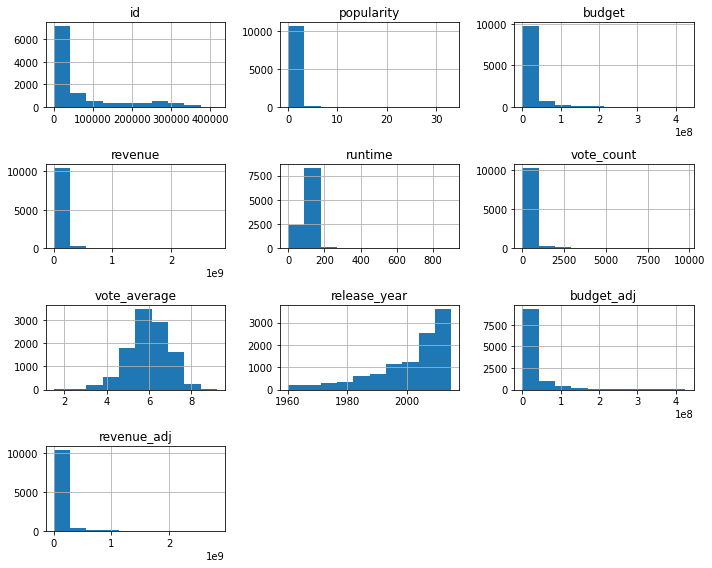

In [6]:
df.hist(figsize=(10,8));
plt.tight_layout()

Most variables are heavily skewed to the right. I think overall the data look correct i.e. there is no negative values.

#### 3. release_date has an incorrect data type

release_date should be a datetime object and not a string

In [7]:
# Convert release_date to a datetime object
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 4. Movies with empty imdb_id

Are movies with empty imdb_id valid? Let's find out.

In [8]:
df[df['imdb_id'].isna()].head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,2015-08-10,12,7.5,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,2014-10-03,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,2009-01-27,38,6.9,2009,0.0,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,2009-01-27,38,6.4,2009,0.0,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,2010-09-21,10,8.6,2010,0.0,0.0


It looks like these are all valid movies but with corrupted imdb_id values. For example, I found the IMDB ID for Sense8: Creating the World by googling it: https://www.imdb.com/title/tt6963278/.

*We will keep all rows with empty imdb_id*.

#### 5. Genres contain multiple values

Genres are separated by pipes (`|`). Rather than having multiple genres in a single column, let's divide them into multiple rows so that a single row has a single genre. This is so that we 

In [9]:
df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [10]:
def split_var(df, varname, new_varname, separator='|'):
    """ Split a dataframe where a variable with multiple values is unrolled into multiple rows.
    
    Args:
    - df: The DataFrame object
    - varname: Current variable name
    - new_varname: New variable name that contains the singular item
    - separator: Separator in the variable
    """
    df[new_varname] = df[varname].str.split('|')
    dfg = df.explode(new_varname)
    return dfg

dfg = split_var(df, 'genres', 'genre')
dfg[['id', 'imdb_id', 'genres', 'genre']].head(10)

,id,imdb_id,genres,genre
0,135397,tt0369610,Action|Adventure|Science Fiction|Thriller,Action
0,135397,tt0369610,Action|Adventure|Science Fiction|Thriller,Adventure
0,135397,tt0369610,Action|Adventure|Science Fiction|Thriller,Science Fiction
0,135397,tt0369610,Action|Adventure|Science Fiction|Thriller,Thriller
1,76341,tt1392190,Action|Adventure|Science Fiction|Thriller,Action
1,76341,tt1392190,Action|Adventure|Science Fiction|Thriller,Adventure
1,76341,tt1392190,Action|Adventure|Science Fiction|Thriller,Science Fiction
1,76341,tt1392190,Action|Adventure|Science Fiction|Thriller,Thriller
2,262500,tt2908446,Adventure|Science Fiction|Thriller,Adventure
2,262500,tt2908446,Adventure|Science Fiction|Thriller,Science Fiction


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

First, let's see how many movies each genre has.

In [11]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

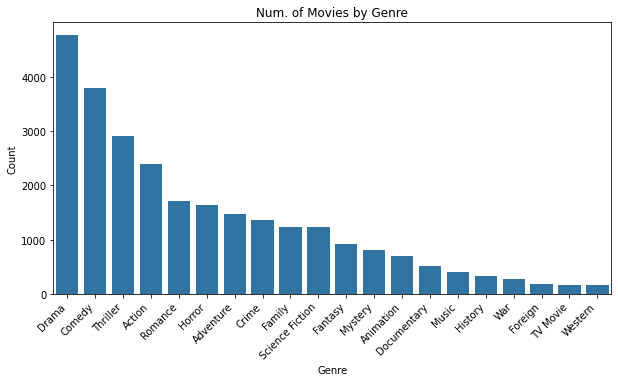

In [12]:
def ordered_countplot(df, var, color=sns.color_palette("tab10")[0]):
    """ Draw a countplot that is ordered in descending order.
    
    Args:
    - df: The DataFrame object
    - var: Variable name
    - color: Color of the bars
    """
    return sns.countplot(data=df, x=var, color=color, order = df[var].value_counts().index)
plt.figure(figsize=(10,5))
g = ordered_countplot(dfg, 'genre')
g.set_xlabel("Genre")
g.set_ylabel("Count")
g.set_title("Num. of Movies by Genre")
plt.xticks(rotation=45, ha='right');

Drama genre has the most number of movies, folowed by Comedy, and Thriller. There weren't as many movies in the TV Movie and Western categories.

How do the number of movies fare across the years?

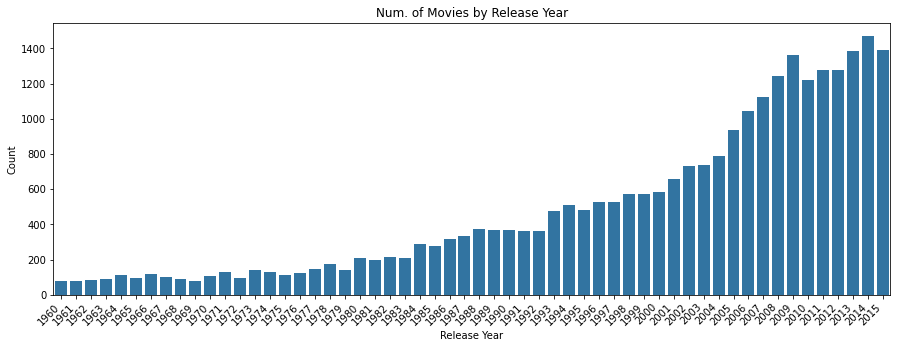

In [13]:
# Create a histogram
plt.figure(figsize=(15,5))
g = sns.countplot(data=dfg, x='release_year', color=sns.color_palette("tab10")[0])
g.set_xlabel("Release Year")
g.set_ylabel("Count")
g.set_title("Num. of Movies by Release Year")
plt.xticks(rotation=45, ha='right');

The number of movies released generally increases each year, and it reached its peak in 2014. I can't tell from the graph above whether there were more movies released in 2015 or 2013, so I'll create another bar chart below, ordered by the number of movies in descending order:

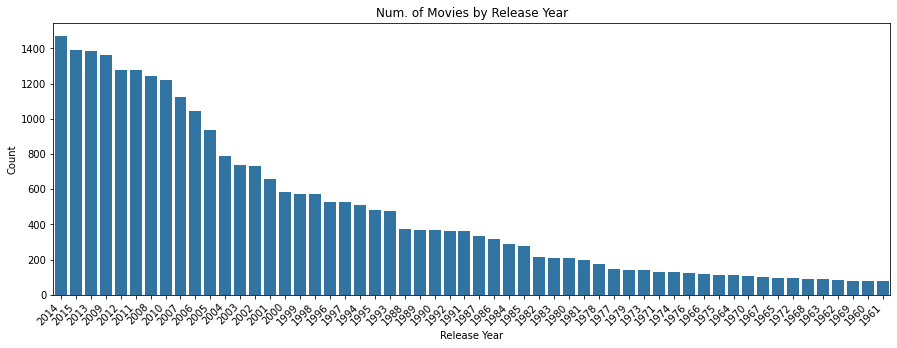

In [14]:
# Create a histogram
plt.figure(figsize=(15,5))
g = ordered_countplot(dfg, 'release_year')
g.set_xlabel("Release Year")
g.set_ylabel("Count")
g.set_title("Num. of Movies by Release Year")
plt.xticks(rotation=45, ha='right');

Turns out there were more movies released in 2015 than 2013.

Next, let's see how the movie popularities are distributed.

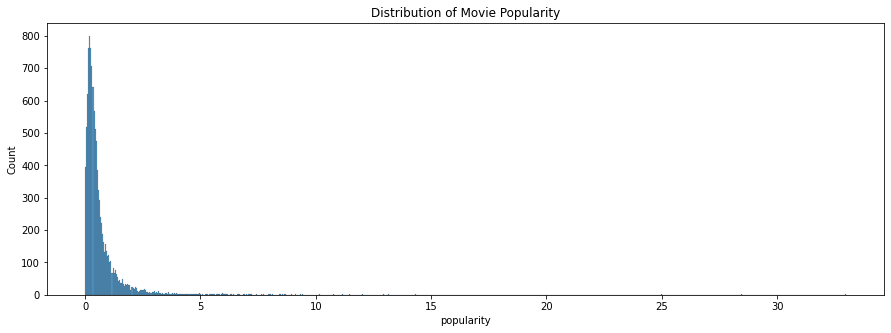

In [15]:
# Create a histogram
plt.figure(figsize=(15,5))
g = sns.histplot(data=df, x='popularity')
g.set_title("Distribution of Movie Popularity");

The distribution is rather difficult to analyze due to the outliers that greatly skewed it. Let's see how the distribution looks like with outliers removed.

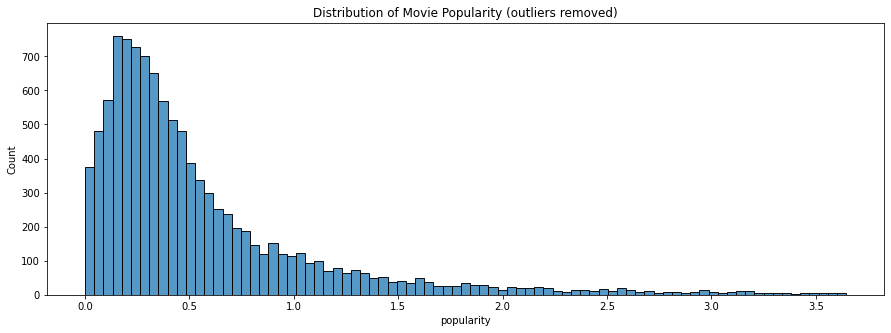

In [16]:
plt.figure(figsize=(15,5))

def remove_outliers(df, fields, std=3):
    """ Remove outliers in a dataframe given a standard deviation
    
    Args:
    - df: The DataFrame object
    - fields: Fields to process
    - std: How many standard deviations to keep?
    """
    return df[(np.abs(stats.zscore(df[fields])) < std).all(axis=1)]

df_no_outliers = remove_outliers(df, ['popularity'], std=3)
g = sns.histplot(data=df_no_outliers, x='popularity')
g.set_title("Distribution of Movie Popularity (outliers removed)");

Popularity is somewhat normally distributed with a long tail to the right. To understand the statistics of the distribution better, analyze with a box plot.

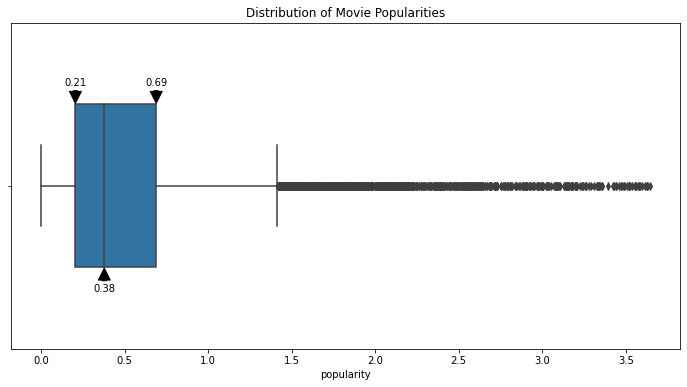

In [17]:
def annot_boxplot(df, varname, box_width=0.5):
    """ Create an annotated boxplot.
    
    Args:
    - df: The DataFrame
    - varname:
    """
    ax = sns.boxplot(x=df[varname], width=box_width)

    Q1, Q2, Q3 = df[varname].quantile([0.25, 0.5, 0.75])
    for q in (Q1, Q3):
        x = q
        y = 0-box_width/2
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x, y-0.05), textcoords='data',
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    va='bottom', ha='center')

    x = Q2
    y = 0+box_width/2
    ax.annotate('%.2f' % Q2, (x,y),
        xytext=(x, y+0.05), textcoords='data',
        arrowprops=dict(facecolor='black', shrink=0.05),
        va='top', ha='center')
    return ax

plt.figure(figsize=(12,6))        
ax = annot_boxplot(df_no_outliers, 'popularity')
ax.set_title("Distribution of Movie Popularities");

Most movies have the popularity score somewhere between 0.21 and 0.69, and the mean popularity score is 0.38. The distribution is right-skewed.

And, finally, let's take a look at which genres are most popular from year to year. Note that in this analysis we are going to use the dataframe with popularity scores intact i.e. no outliers removed.

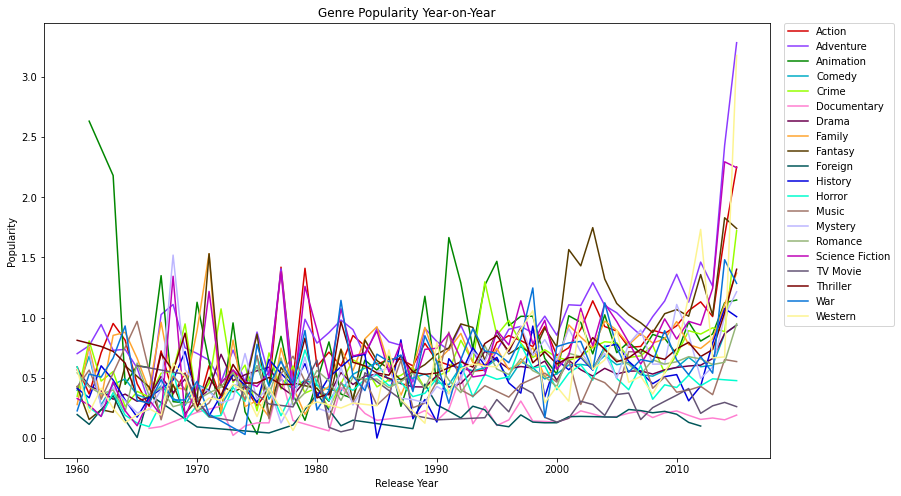

In [18]:
# Create a grouped line chart
dfg1 = dfg.groupby(['genre', 'release_year'])['popularity'].mean().reset_index()
plt.figure(figsize=(13,8))
g = sns.lineplot(
    data=dfg1,
    x="release_year", y="popularity", hue="genre",
    palette=sns.color_palette(cc.glasbey, n_colors=dfg1['genre'].value_counts().shape[0])
)
g.set_xlabel("Release Year")
g.set_ylabel("Popularity")
g.set_title("Genre Popularity Year-on-Year")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

The plot is rather difficult to read, but there are some noticable trends here, like how **the animation genre was immensely popular in the 1960s and the Adventure and Western genre were the most popular ones in 2015.**

Since we have two discrete variable (genre and release year) and one continuous variable (popularity), we could make use of the heatmap visualization to help us find more nuances in the data.

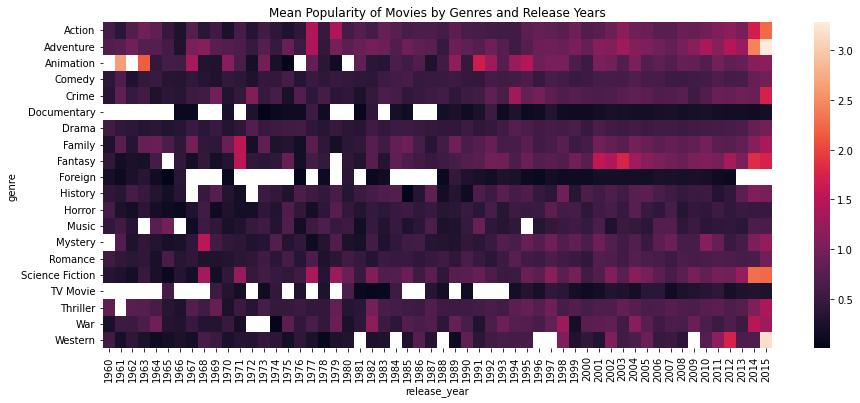

In [19]:
# Create a heatmap
plt.figure(figsize=(15,6))
dfg_h1 = dfg1.pivot('genre', 'release_year', 'popularity')
ax = sns.heatmap(dfg_h1)
ax.set_title("Mean Popularity of Movies by Genres and Release Years");

This is amazing! The heatmap has indeed given us more understanding of the data. Here are some insights I managed to find:

1. **Animation genre was really popular in 1961 and 1964, and it reached another peak popularity between 1991 and 1995 (I think these were the times Disney produced masterpieces like Lion King, Aladdin, etc.).**
2. **More genres had more popularity in the later years rather than earlier ones. Probably due to more exposure in the media, like the internet?**
3. **Some genres have never been really popular, like Documentary, Foreign, and TV Movie.**

### What kinds of properties are associated with movies that have high revenues?

1. We may answer this question more accurately by using adjusted revenues rather than nominal revenues since the former is adjusted for inflation.
2. The easiest analysis to perform here is by looking at the correlation between adjusted revenues and numerical variables.

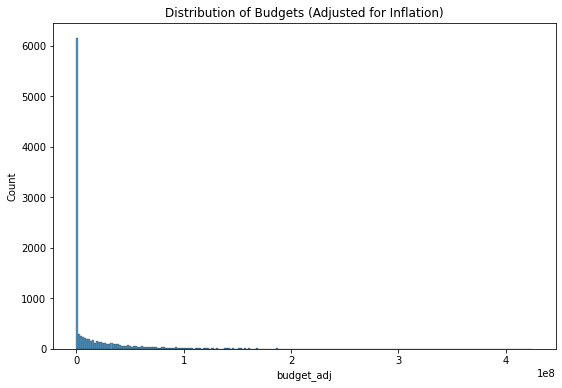

In [20]:
plt.figure(figsize=(9,6))
g = sns.histplot(data=df, x='budget_adj')
g.set_title("Distribution of Budgets (Adjusted for Inflation)");

The adjusted budget distribution is heavily right-skewed with the largest values reached more than $400 millions. The long-tail does not seem to be caused by outliers either, as shown in the log-scaled distribution below:

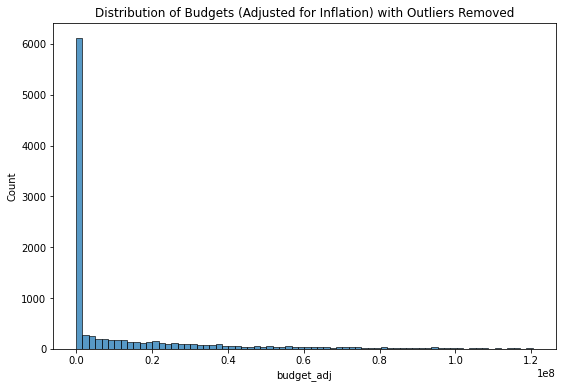

In [21]:
plt.figure(figsize=(9,6))
df_no_outliers = remove_outliers(df, ['budget_adj'], std=3)
g = sns.histplot(data=df_no_outliers, x='budget_adj')
g.set_title("Distribution of Budgets (Adjusted for Inflation) with Outliers Removed");

At this point, I am kind of curious as to which movies had the largest budgets.

In [22]:
df[['original_title', 'budget_adj']].sort_values(by='budget_adj', ascending=False)[0:10]

,original_title,budget_adj
2244,The Warrior's Way,4.250000e+08
3375,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
7387,Pirates of the Caribbean: At World's End,3.155006e+08
6570,Superman Returns,2.920507e+08
5231,Titanic,2.716921e+08
7394,Spider-Man 3,2.713305e+08
1929,Tangled,2.600000e+08
14,Avengers: Age of Ultron,2.575999e+08
1389,Harry Potter and the Half-Blood Prince,2.541001e+08
8089,Waterworld,2.504192e+08


I checked Wikipedia and these budgets seem to be correct.

Now, let's see how budget and revenue are correlated.

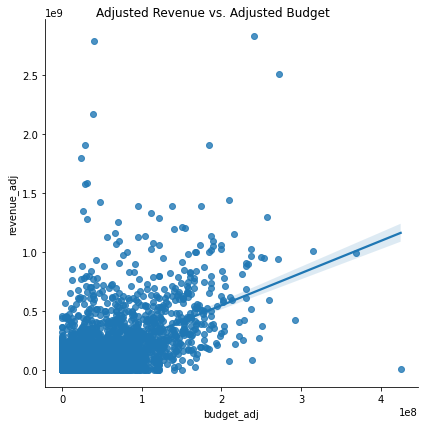

In [23]:
# fit_reg added a linear regression to the plot.
g = sns.lmplot(data=df, x='budget_adj', y='revenue_adj', fit_reg=True, height=6)
# g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle("Adjusted Revenue vs. Adjusted Budget");

There is indeed a positive correlation between budget and revenue.

Doing the same for every single variable is tiring, so let's perform a bulk correlation analysis on all numerical variables.

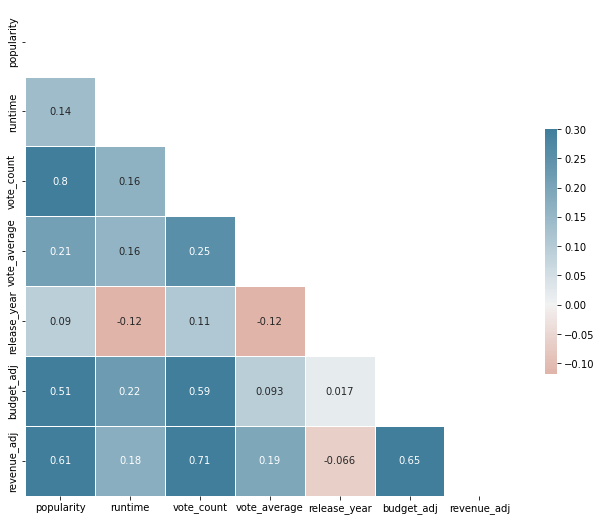

In [24]:
def corrplot(df):
    """ Draw a corrplot
    
    Args:
    - df: The DataFrame object
    """
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                annot=corr.values,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
corrplot(df.drop(['id', 'budget', 'revenue'], axis=1))

A couple of things stood out in the correlation plot above:

- The strongest predictors of adjusted revenue are popularity, vote count, and adjusted budget i.e. their correlations with adjusted revenue are closer to 1.0 compared to other variables.
- Vote count is highly correlated with popularity (0.8). This is a case of multicollinearity and so I would remove the popularity variable from the feature list.

We may then conclude that **movies with high revenue generally have high vote count and budget.**

### How about categorical variables?

Suppose we want to identify categories that are associated with high revenue movies. For example, are there particular genre and keyword combination that are correlated with movies with high revenue?

This takes a bit of work to do, but not impossible.

Firstly, remember that earlier we divided the `genres` variable into multiple rows with a single `genre` value. See below that we ended up with 20 variations of `genre` value where originally we had 2039 variations of `genres`:

In [25]:
dfg.agg(['nunique']).T

,nunique
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


Now, let's do the same operation to keywords.

In [26]:
dfg_k = split_var(dfg, 'keywords', 'keyword')
display(dfg_k[['id', 'imdb_id', 'genre', 'keyword']].head(10))

,id,imdb_id,genre,keyword
0,135397,tt0369610,Action,monster
0,135397,tt0369610,Action,dna
0,135397,tt0369610,Action,tyrannosaurus rex
0,135397,tt0369610,Action,velociraptor
0,135397,tt0369610,Action,island
0,135397,tt0369610,Adventure,monster
0,135397,tt0369610,Adventure,dna
0,135397,tt0369610,Adventure,tyrannosaurus rex
0,135397,tt0369610,Adventure,velociraptor
0,135397,tt0369610,Adventure,island


As seen above, we end up with even more rows with identical ids. How many keyword variations are there?

In [27]:
dfg_k['keyword'].nunique()

7878

I think 7878 is too many variations that would render this variable useless as a feature.

Let's do another similar analysis, but this time to see whether movies that were released in a particular month with a certain genre amassed more revenue.

In [28]:
# Create a month variable.
dfg['month'] = df['release_date'].dt.month

# Group by month and genre and then find the median revenue_adj
# (Why median? So it does not get skewed by one or two movies with large revenues, considering we have a very
# right-skewed distribution)
dfg_g = dfg[['month', 'genre', 'revenue_adj']].groupby(['month', 'genre']).median().reset_index()

dfg_g

,month,genre,revenue_adj
0,1,Action,0.000000e+00
1,1,Adventure,0.000000e+00
2,1,Animation,0.000000e+00
3,1,Comedy,0.000000e+00
4,1,Crime,0.000000e+00
...,...,...,...
235,12,Science Fiction,0.000000e+00
236,12,TV Movie,0.000000e+00
237,12,Thriller,4.380159e+06
238,12,War,7.765907e+07


Before looking at the correlations, let's just quickly check how the months are distributed.

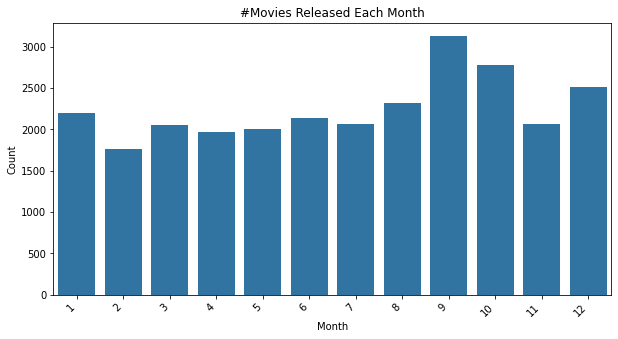

In [29]:
plt.figure(figsize=(10,5))
g = sns.countplot(data=dfg, x='month', color=sns.color_palette("tab10")[0])
g.set_xlabel("Month")
g.set_ylabel("Count")
g.set_title("#Movies Released Each Month")
plt.xticks(rotation=45, ha='right');

Most movies are released in September, followed by October and then December.

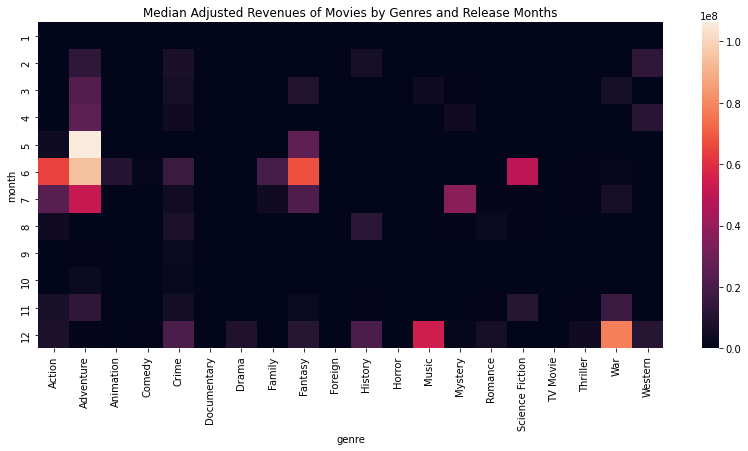

In [30]:
plt.figure(figsize=(14,6))
dfg_h = dfg_g.pivot('month', 'genre', 'revenue_adj')
ax = sns.heatmap(dfg_h)
ax.set_title("Median Adjusted Revenues of Movies by Genres and Release Months");

The takeaway is quite clear here. **Highly successful Adventure movie were mostly released on May. Fantasy movies in June and War movies in December.** Keep in mind that we use median adjusted revenue here. That means this plot does not take into consideration movies with very high revenues. This is the reason for the seemingly low revenues for the Drama movies. When using means, we would see more colors as shown here:

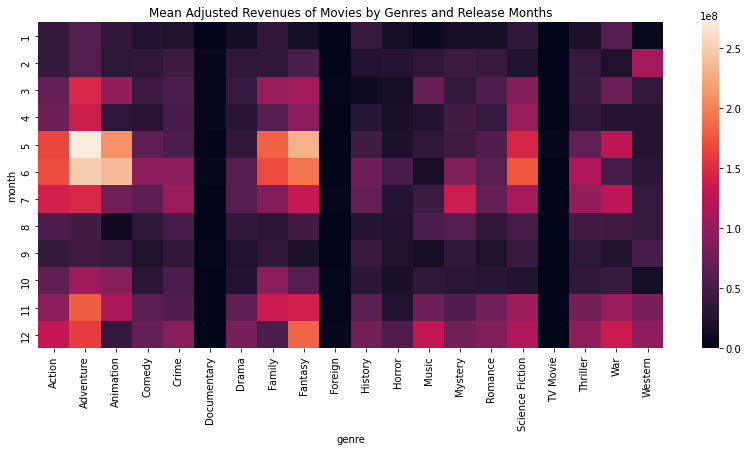

In [31]:
dfg_g1 = dfg[['month', 'genre', 'revenue_adj']].groupby(['month', 'genre']).mean().reset_index()
plt.figure(figsize=(14,6))
dfg_h1 = dfg_g1.pivot('month', 'genre', 'revenue_adj')
ax = sns.heatmap(dfg_h1)
ax.set_title("Mean Adjusted Revenues of Movies by Genres and Release Months");

Notice also one interesting pattern here. Remember how Drama movies were supposed to amass the largest revenue? Turns out, **the average revenue of each Drama movie is very low. This fact aligns with the fact that there are way more Drama movies compared to other genres.**

<a id='conclusions'></a>
## Conclusions

In this project, I have done some clean-ups in the datasets and followed by analyzing the cleaned data. The clean-ups I did were as follows:

1. I converted the `release_date` variable into a datetime object.
2. I unrolled the multiple genres stored in the `genres` variable so that each row has one `genre`.

In the **"Which genres are most popular from year to year?"** section, I found the following insights:

1. The animation genre was immensely popular in the 1960s and the Adventure and Western genre were the most popular ones in 2015.
2. Animation genre was really popular in 1961 and 1964, and it reached another peak popularity between 1991 and 1995 (I think these were the times Disney produced masterpieces like Lion King, Aladdin, etc.).
3. More genres had more popularity in the later years rather than earlier ones. Probably due to more exposure in the media, like the internet?
4. Some genres have never been really popular, like Documentary, Foreign, and TV Movie.

And in the **"What kinds of properties are associated with movies that have high revenues?"** section, here are the insights I found:

1. Movies with high revenue generally have high vote count and high budget. Note that this is correlation and not causation i.e. having a high vote and high budget may not be the cause for a movie to have high revenue.
2. Some genres have high correlation with revenues and release months. For example, highly successful Adventure movie were mostly released on May. Fantasy movies in June and War movies in December.
3. The average revenue of each Drama movie is very low. This fact aligns with the fact that there are way more Drama movies compared to other genres.


## Limitation and Additional Research

It is important to note that this result is by no means explained any causality. Using the data above, we managed to only find correlations between different characteristics in the dataset.

Also, the votes are constrained to only people who are more likely to vote. For all we know, these people could share similar backgrounds and thus not reflective of the whole population of movie watchers. An experiment like those done by Netflix where they gathered data as viewers watch the movies, at which point they stopped watching, what genres were watched together, etc. is a great next step for this kind of research.